In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
df = pd.read_pickle('data/data.pickle')

FileNotFoundError: [Errno 2] No such file or directory: 'data/data.pickle'

In [4]:
df.head()

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,po_number,order_date,shipped_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
981291,2021,Texas Department of Public Safety,"Cisco Systems, Inc.",2657.25,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 4087,...,21P0008145,03/02/2021,05/09/2021,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,48674865
981292,2021,Texas Department of Public Safety,"Cisco Systems, Inc.",3053.83,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 4087,...,21P0008145,03/02/2021,05/09/2021,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,48674866
981293,2021,Texas Department of Public Safety,"Cisco Systems, Inc.",3748.07,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 4087,...,21P0008145,03/02/2021,05/09/2021,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,48674867
981294,2021,Texas Department of Public Safety,"Cisco Systems, Inc.",3748.07,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 4087,...,21P0008145,03/02/2021,05/09/2021,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,48674868
981295,2021,Texas Department of Public Safety,"Cisco Systems, Inc.",3748.07,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 4087,...,21P0008145,03/02/2021,05/09/2021,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,48674869


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378523 entries, 981291 to 7367057
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fiscal_year                378523 non-null  int64  
 1   customer_name              378523 non-null  object 
 2   vendor_name                378523 non-null  object 
 3   purchase_amount            378523 non-null  float64
 4   contract_number            378523 non-null  object 
 5   rfo_description            378523 non-null  object 
 6   rfo_number                 378523 non-null  object 
 7   customer_type              378523 non-null  object 
 8   customer_contact           369036 non-null  object 
 9   customer_address           378523 non-null  object 
 10  customer_city              378523 non-null  object 
 11  customer_state             378523 non-null  object 
 12  customer_zip               378523 non-null  object 
 13  vendor_contact         

In [6]:
df.tail()

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,po_number,order_date,shipped_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
7367053,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",22156.38,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911606
7367054,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",9155.50,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911607
7367055,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",44331.09,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911608
7367056,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",8667.24,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911609
7367057,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",27161.40,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911610


In [13]:
df['order_date'].min(), df['order_date'].max()

('01/01/2016', '12/31/2021')

In [14]:
df['fiscal_year'].min(), df['fiscal_year'].max()

(2014, 2023)

In [15]:
df['shipped_date'].min(),df['shipped_date'].max()

('01/01/2015', '12/31/2021')

In [16]:
df['contract_start_date'].min(), df['contract_start_date'].max()

('05/05/2014', '07/03/2018')

In [17]:
df['contract_end_date'].min(), df['contract_end_date'].max()

('07/03/2022', '07/04/2018')

In [18]:
df['contract_termination_date'].min(), df['contract_termination_date'].max()

('07/03/2023', '07/04/2018')

In [29]:
columns = ['order_date', 'shipped_date', 'contract_start_date', 'contract_end_date', 'contract_termination_date']

In [30]:
df_dates = pd.DataFrame()
for column in columns:
    df_dates[column] = pd.to_datetime(df[column])

df_dates.head()

,order_date,shipped_date,contract_start_date,contract_end_date,contract_termination_date
981291,2021-03-02,2021-05-09,2018-07-03,2022-07-03,2023-07-03
981292,2021-03-02,2021-05-09,2018-07-03,2022-07-03,2023-07-03
981293,2021-03-02,2021-05-09,2018-07-03,2022-07-03,2023-07-03
981294,2021-03-02,2021-05-09,2018-07-03,2022-07-03,2023-07-03
981295,2021-03-02,2021-05-09,2018-07-03,2022-07-03,2023-07-03


<AxesSubplot:>

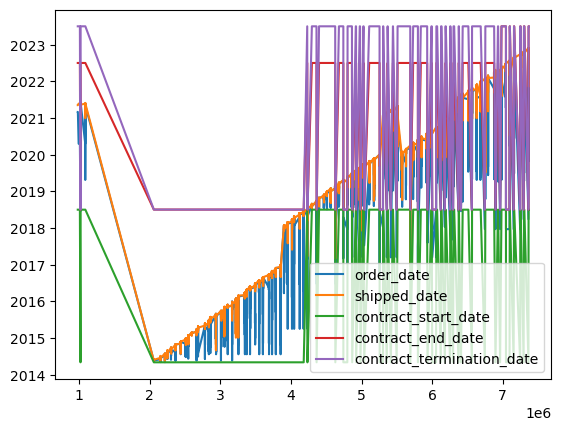

In [31]:
df_dates.plot()

In [41]:
df_dates['order_date'].min(), df_dates['order_date'].max()

(Timestamp('2014-05-06 00:00:00'), Timestamp('2022-11-29 00:00:00'))

In [42]:
df_dates['shipped_date'].min(),df_dates['shipped_date'].max()

(Timestamp('2014-05-20 00:00:00'), Timestamp('2022-11-30 00:00:00'))

In [43]:
df_dates['contract_start_date'].min(), df_dates['contract_start_date'].max()

(Timestamp('2014-05-05 00:00:00'), Timestamp('2018-07-03 00:00:00'))

In [44]:
df_dates['contract_end_date'].min(), df_dates['contract_end_date'].max()

(Timestamp('2018-07-04 00:00:00'), Timestamp('2023-07-03 00:00:00'))

In [45]:
df_dates['contract_termination_date'].min(), df_dates['contract_termination_date'].max()

(Timestamp('2018-07-04 00:00:00'), Timestamp('2023-07-03 00:00:00'))

,order_date,shipped_date,contract_start_date,contract_end_date,contract_termination_date
981291,2021-03-02,2021-05-09,2018-07-03,2022-07-03,2023-07-03
981292,2021-03-02,2021-05-09,2018-07-03,2022-07-03,2023-07-03
981293,2021-03-02,2021-05-09,2018-07-03,2022-07-03,2023-07-03
981294,2021-03-02,2021-05-09,2018-07-03,2022-07-03,2023-07-03
981295,2021-03-02,2021-05-09,2018-07-03,2022-07-03,2023-07-03
...,...,...,...,...,...
7367053,2022-06-15,2022-10-30,2018-07-03,2023-07-03,2023-07-03
7367054,2022-06-15,2022-10-30,2018-07-03,2023-07-03,2023-07-03
7367055,2022-06-15,2022-10-30,2018-07-03,2023-07-03,2023-07-03
7367056,2022-06-15,2022-10-30,2018-07-03,2023-07-03,2023-07-03
